In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start ='2014-01-01'
end ='2024-12-31'
stock ='GOOG'

data = yf.download(stock, start, end)

C:\Users\akanksha\AppData\Local\Temp\ipykernel_12888\2502957443.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace = True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.535648,27.650183,27.415425,27.593535,73129082
1,2014-01-03,27.334782,27.629898,27.333050,27.582156,66917888
2,2014-01-06,27.639547,27.677642,27.370405,27.532929,71037271
3,2014-01-07,28.172386,28.192919,27.734537,27.829527,102486711
4,2014-01-08,28.231016,28.381667,28.034601,28.349014,90036218
...,...,...,...,...,...,...
2762,2024-12-23,195.357346,195.855732,191.011419,193.403666,15235900
2763,2024-12-24,196.932236,197.031904,194.567883,195.536746,6809800
2764,2024-12-26,196.463745,197.520321,195.237705,196.104907,7907900


In [6]:
ma_100_days = data.Close.rolling(100).mean()

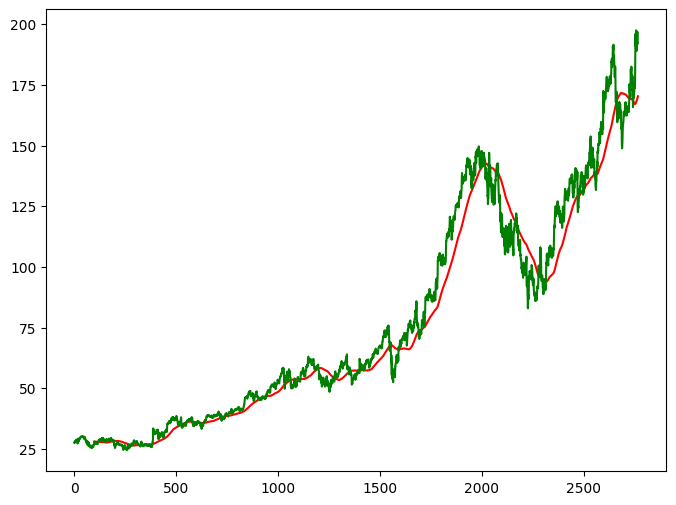

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

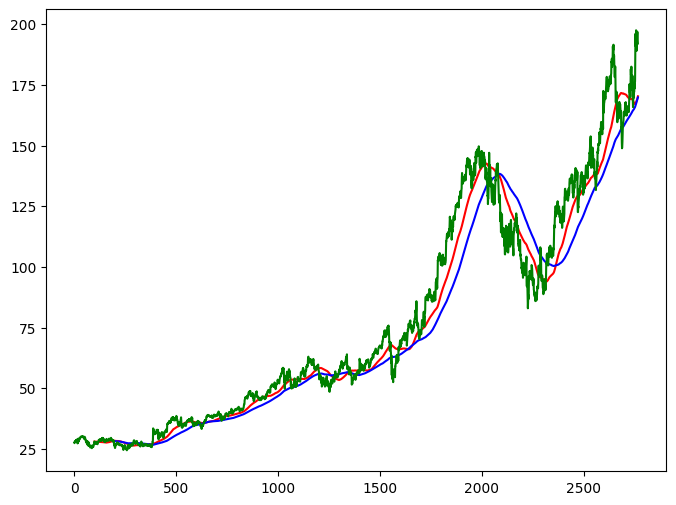

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2213

In [13]:
data_test.shape[0]

554

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [30]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\akanksha\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - loss: 0.0364
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - loss: 0.0063
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 257ms/step - loss: 0.0055
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - loss: 0.0051
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - loss: 0.0047
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - loss: 0.0058
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - loss: 0.0046
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - loss: 0.0051
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - loss: 0.0042
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 251ms/step - loss: 0.0034
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - loss: 0.0041
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 271ms/step - loss: 0.0041
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - loss: 0.0036
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - loss: 0.0040
Epoch 16/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [34]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [35]:
pas_100_days = data_train.tail(100)

In [36]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [37]:
data_test_scale = scaler.fit_transform(data_test)

In [38]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [39]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step


In [41]:
scale = 1/scaler.scale_

In [42]:
y_predict = y_predict*scale

In [43]:
y = y*scale

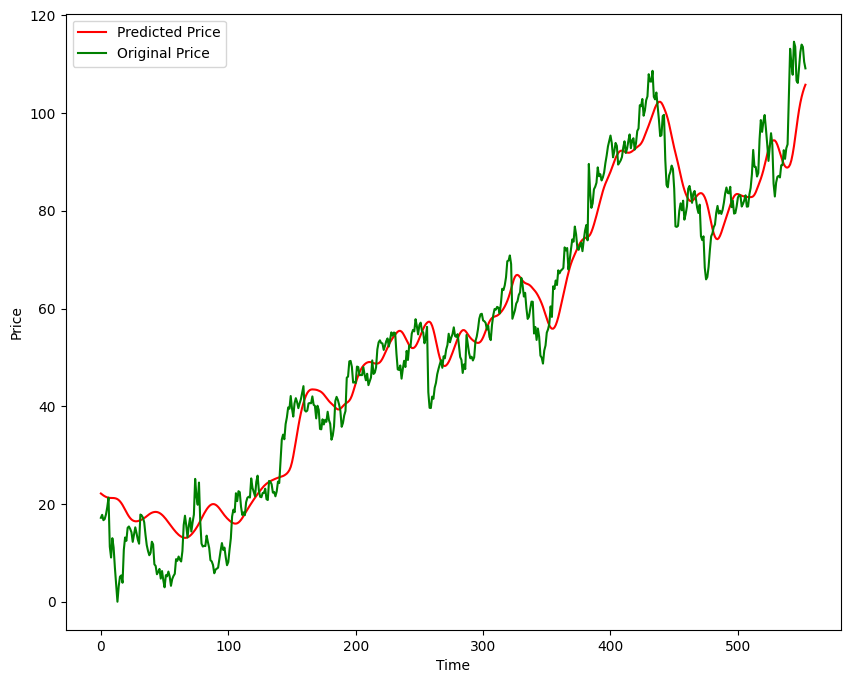

In [44]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
model.save('Stock Predictions Model.keras')